In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
sns.set_palette('pastel')

In [4]:
df = pd.read_csv('../../data/raw/sleep_cycle_productivity.csv')
df.head(5)

,Date,Person_ID,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Caffeine Intake (mg),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,1860,32,Other,23.33,4.61,5.28,3,86,87,116,8.808920,8,3,6
1,2024-11-04,1769,41,Female,21.02,2.43,5.41,5,32,21,88,6.329833,10,3,7
2,2024-08-31,2528,20,Male,22.10,3.45,5.35,7,17,88,59,8.506306,10,9,10
3,2024-02-22,8041,37,Other,23.10,6.65,7.55,8,46,34,80,6.070240,8,4,2
4,2024-02-23,4843,46,Other,21.42,4.17,6.75,10,61,269,94,11.374994,8,7,9


In [5]:
df.drop(['Person_ID','Caffeine Intake (mg)'], axis=1, inplace=True)
df.head(5)

,Date,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level
0,2024-04-12,32,Other,23.33,4.61,5.28,3,86,116,8.808920,8,3,6
1,2024-11-04,41,Female,21.02,2.43,5.41,5,32,88,6.329833,10,3,7
2,2024-08-31,20,Male,22.10,3.45,5.35,7,17,59,8.506306,10,9,10
3,2024-02-22,37,Other,23.10,6.65,7.55,8,46,80,6.070240,8,4,2
4,2024-02-23,46,Other,21.42,4.17,6.75,10,61,94,11.374994,8,7,9


In [6]:
df.Gender[df['Gender']== 'Female'] = '0'
df.Gender[df['Gender']== 'Male'] = '1'
df.Gender[df['Gender']== 'Other'] = '2'

df['Sleep Quality'] = df['Sleep Quality'].astype('category')
df['Productivity Score'] = df['Productivity Score'].astype('category')
df['Mood Score'] = df['Mood Score'].astype('category')
df['Stress Level'] = df['Stress Level'].astype('category')

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Weekday'] = df['Date'].dt.day_name()

C:\Users\haa\AppData\Local\Temp\ipykernel_15044\511494153.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Gender[df['Gender']== 'Female'] = '0'
C:\Users\haa\AppData\Local\Temp\ipykernel_15044\511494153.py:1: SettingWithCopyWarning: 
A

In [7]:
df.head(5)

,Date,Age,Gender,Sleep Start Time,Sleep End Time,Total Sleep Hours,Sleep Quality,Exercise (mins/day),Screen Time Before Bed (mins),Work Hours (hrs/day),Productivity Score,Mood Score,Stress Level,Weekday
0,2024-04-12,32,2,23.33,4.61,5.28,3,86,116,8.808920,8,3,6,Friday
1,2024-11-04,41,0,21.02,2.43,5.41,5,32,88,6.329833,10,3,7,Monday
2,2024-08-31,20,1,22.10,3.45,5.35,7,17,59,8.506306,10,9,10,Saturday
3,2024-02-22,37,2,23.10,6.65,7.55,8,46,80,6.070240,8,4,2,Thursday
4,2024-02-23,46,2,21.42,4.17,6.75,10,61,94,11.374994,8,7,9,Friday


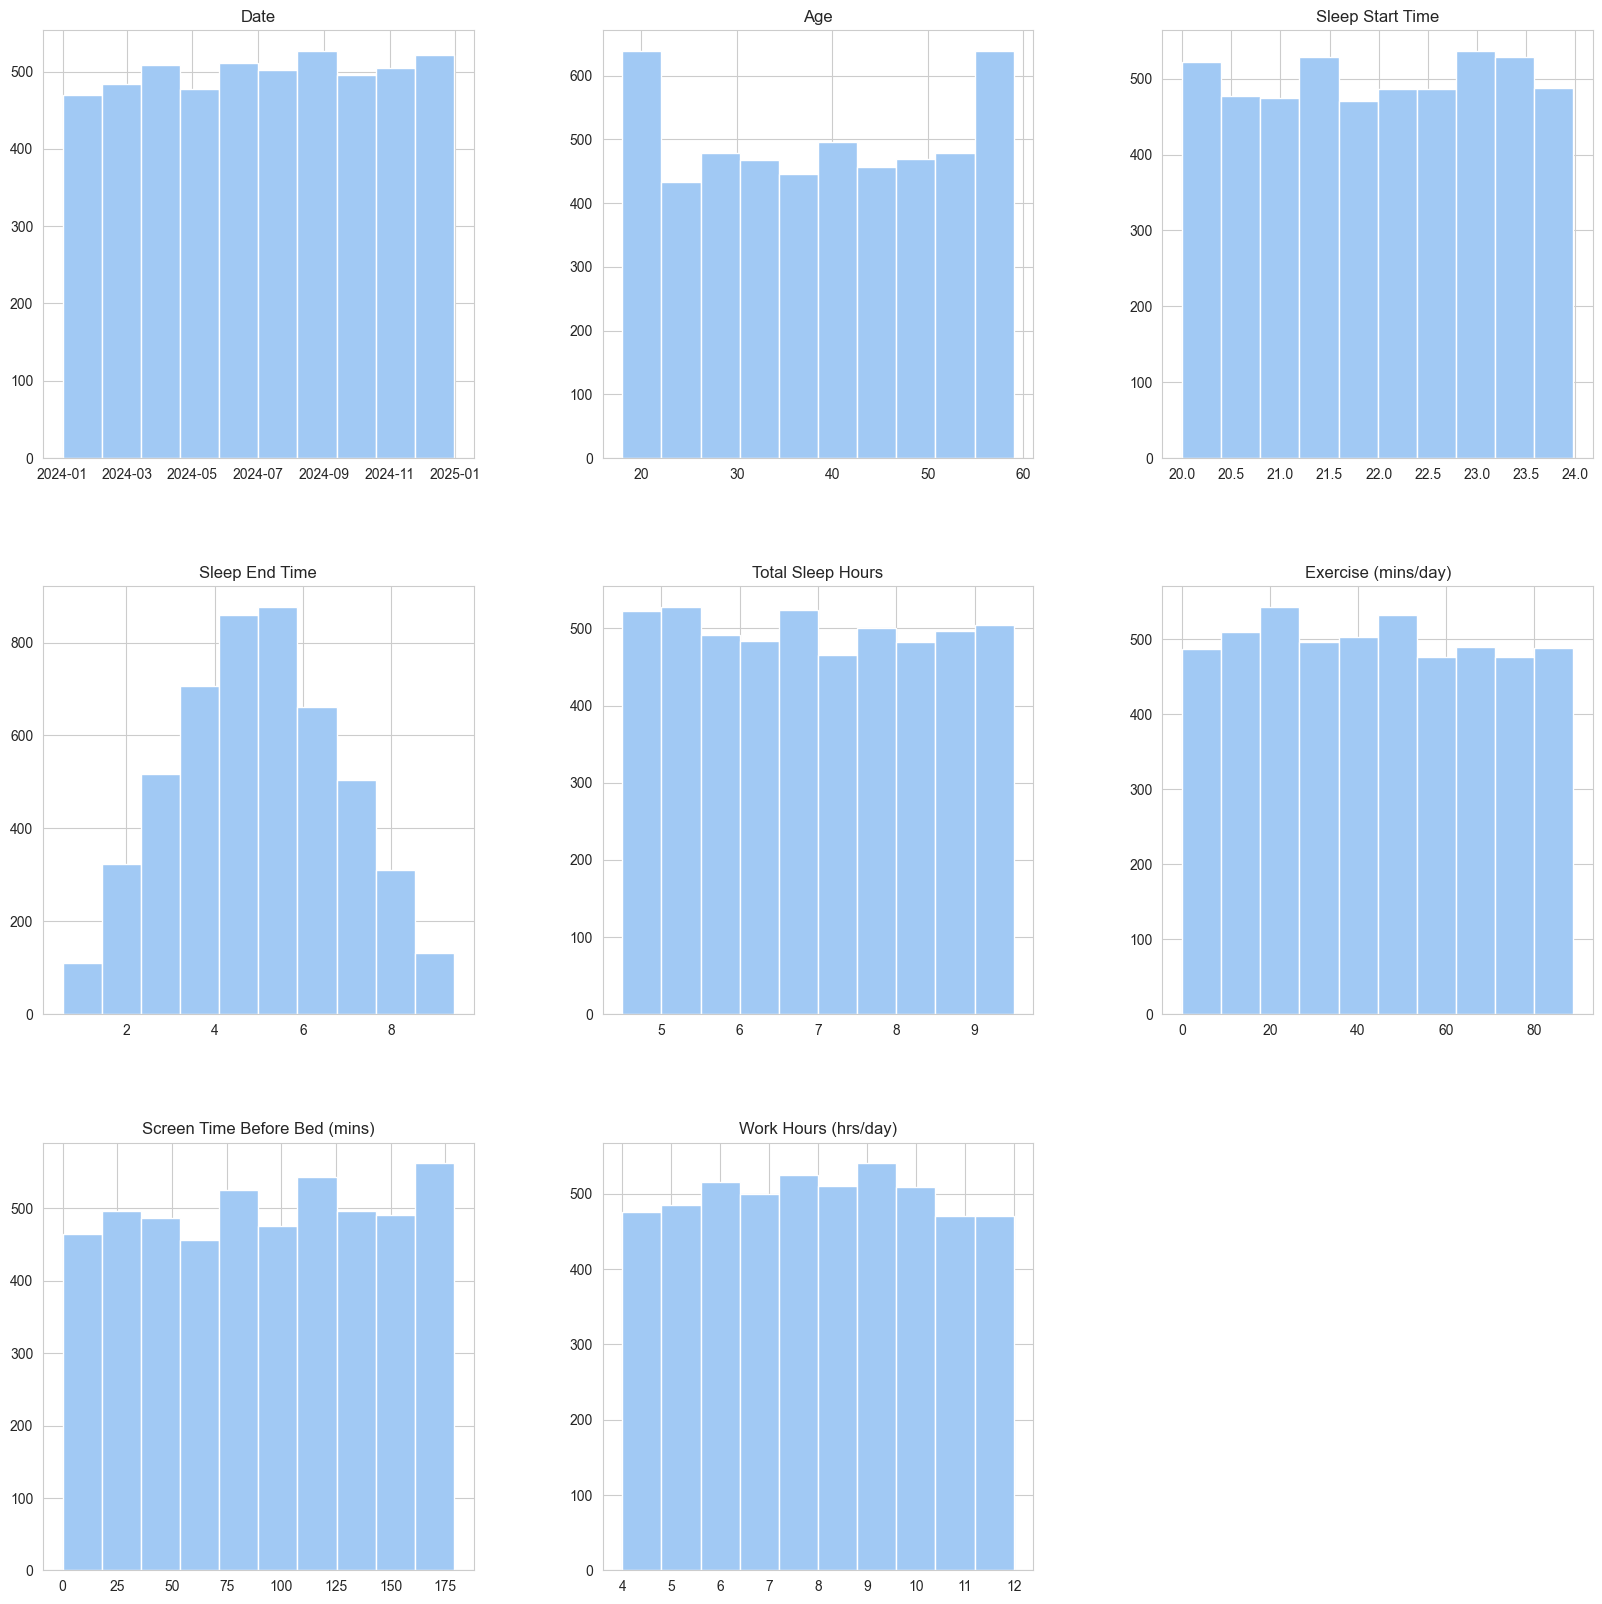

In [8]:
df.hist(figsize=(20,20))
plt.savefig('../../outputs/figures/1_1_distribution_all_numeric_features.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
df.columns

Index(['Date', 'Age', 'Gender', 'Sleep Start Time', 'Sleep End Time',
       'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
       'Productivity Score', 'Mood Score', 'Stress Level', 'Weekday'],
      dtype='object')

In [10]:
cols = ['Date', 'Age', 'Gender', 'Sleep Start Time', 'Sleep End Time',
       'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
       'Productivity Score', 'Mood Score', 'Stress Level']

In [11]:
category_features = df.select_dtypes(include=['object', 'category']).columns.tolist()

In [12]:
category_features

['Gender',
 'Sleep Quality',
 'Productivity Score',
 'Mood Score',
 'Stress Level',
 'Weekday']

####**범주형**####

In [13]:
df.columns

Index(['Date', 'Age', 'Gender', 'Sleep Start Time', 'Sleep End Time',
       'Total Sleep Hours', 'Sleep Quality', 'Exercise (mins/day)',
       'Screen Time Before Bed (mins)', 'Work Hours (hrs/day)',
       'Productivity Score', 'Mood Score', 'Stress Level', 'Weekday'],
      dtype='object')

In [20]:
cols = ['Gender',
        'Productivity Score',
        'Mood Score',
        'Stress Level',
        'Weekday']

x_column = ['Gender',
            'Productivity Score',
            'Mood Score',
            'Stress Level',
            'Weekday']

In [ ]:
def create_plot_pivot(df, x_column):
    df_grouped = df.groupby([x_column, 'Sleep Quality']).size().reset_index(name='count')
    df_pivot = df_grouped.pivot(index=x_column, columns='Sleep Quality', values='count')
    return df_pivot


C:\Users\haa\AppData\Local\Temp\ipykernel_15044\2083672632.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = data.groupby([x_column, 'Sleep Quality']).size().reset_index(name='count')
C:\Users\haa\AppData\Local\Temp\ipykernel_15044\2083672632.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = data.groupby([x_column, 'Sleep Quality']).size().reset_index(name='count')
C:\Users\haa\AppData\Local\Temp\ipykernel_15044\2083672632.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain curre

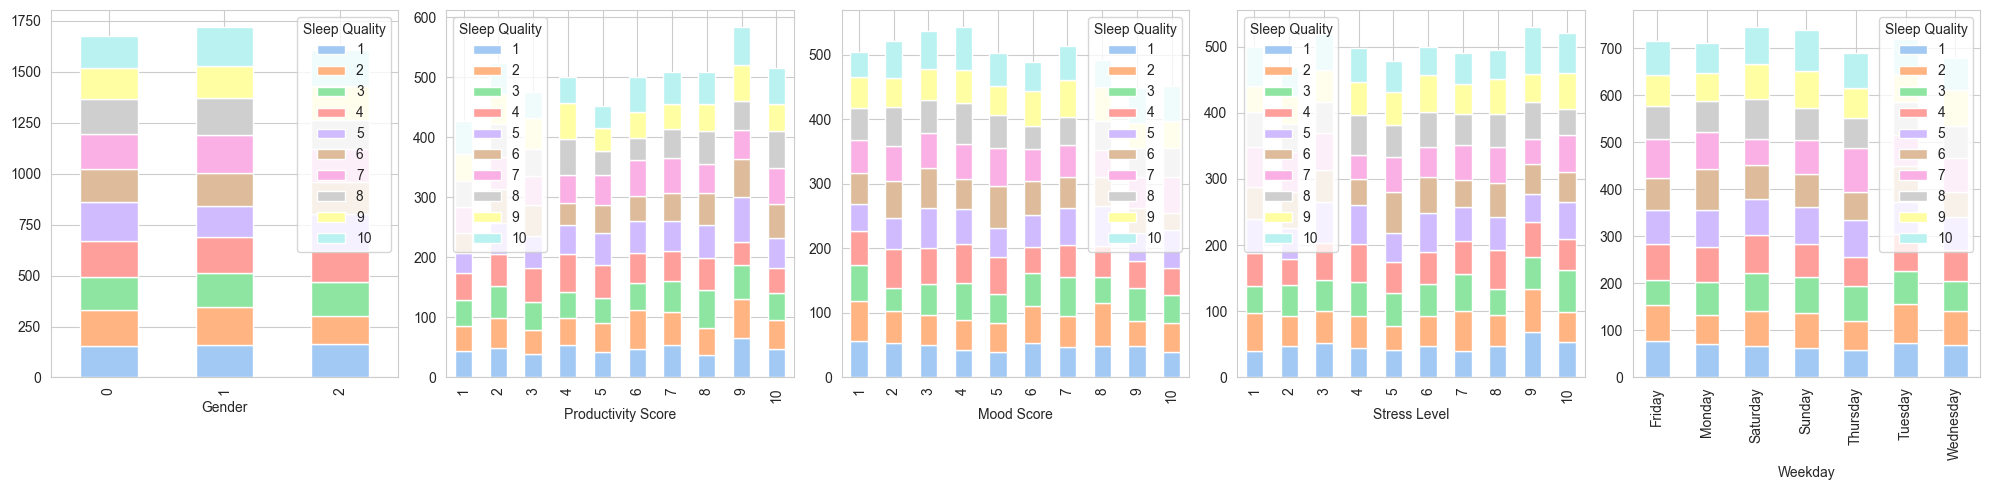

In [16]:
fig, ax = plt.subplots(1, len(cols), figsize=(20, 5))
axe = ax.ravel()

for i in range(len(cols)):
    create_plot_pivot(df, cols[i]).plot(kind='bar', stacked=True, ax=axe[i])
    axe[i].set_xlabel(cols[i])

plt.tight_layout()
plt.savefig('../../outputs/figures/1_2_sleep_quality_by_cols.png', dpi=300, bbox_inches='tight')
plt.show()

C:\Users\haa\AppData\Local\Temp\ipykernel_15044\2401068289.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Sleep Quality'],ax=plot1[0], palette=purple_palette)


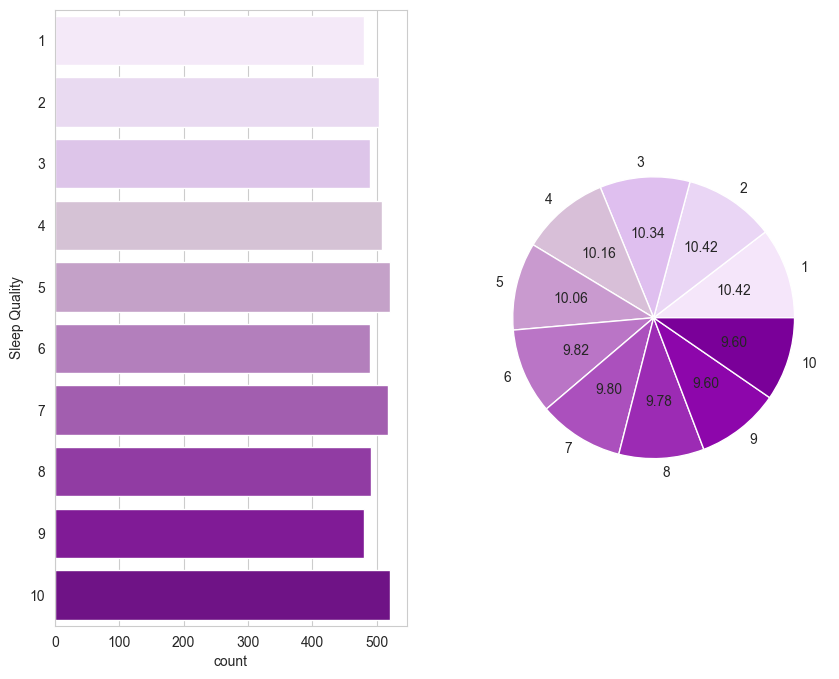

In [17]:
figure1, plot1 = plt.subplots(1,2,figsize=(10,8))

purple_palette = [
    "#F5E6FA", "#EAD6F5", "#DFBFEF", "#D8BFD8", "#C99ACF",
    "#BA75C6", "#AB50BD", "#9C2BB4", "#8D06AB", "#7A0099"
]

sns.countplot(df['Sleep Quality'],ax=plot1[0], palette=purple_palette)

labels=["1","2","3","4","5","6","7","8","9","10"]

plt.pie(df["Sleep Quality"].value_counts() , labels =labels ,autopct='%.02f',colors=purple_palette);

C:\Users\haa\AppData\Local\Temp\ipykernel_15044\1056111465.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Sleep Quality', y = 'Productivity Score', data = df, palette=pink_palette)


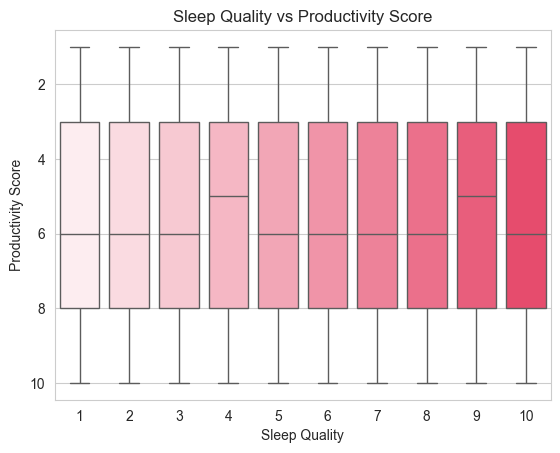

In [26]:
pink_palette = [
    "#FFEBEF", "#FFD6DE", "#FFC1CE", "#FFADBE", "#FF99AF",
    "#FF85A0", "#FF708F", "#FF5C7F", "#FF476F", "#FF335F"
]

sns.boxplot(x = 'Sleep Quality', y = 'Productivity Score', data = df, palette=pink_palette)
plt.title('Sleep Quality vs Productivity Score')
plt.show()

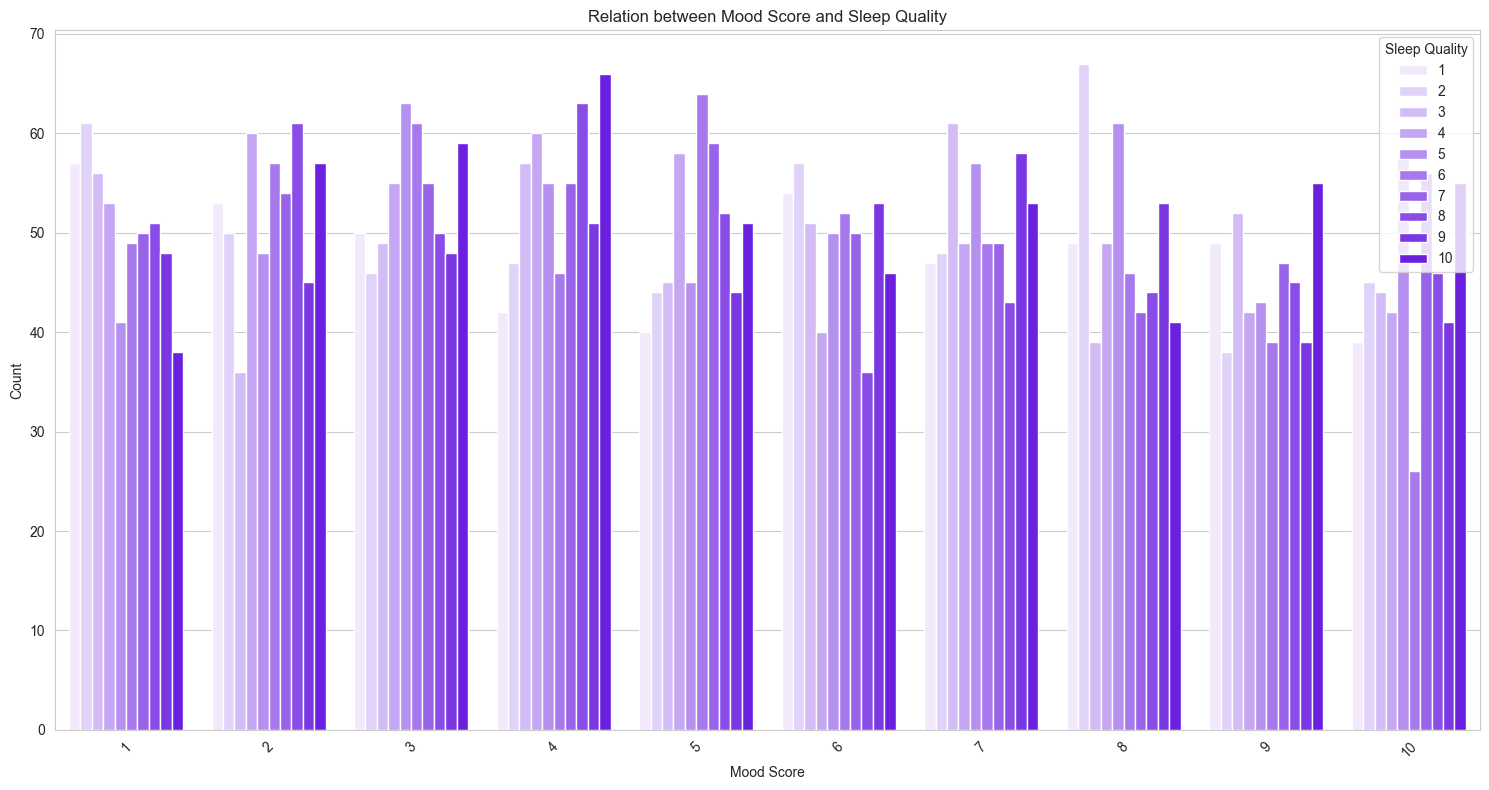

In [30]:

plt.figure(figsize=(15, 8))

sns.countplot(
    data=df,
    x="Mood Score",
    hue="Sleep Quality",
    palette = {
    1: '#f2e6ff',
    2: '#e0ccff',
    3: '#d1b3ff',
    4: '#c299ff',
    5: '#b380ff',
    6: '#a366ff',
    7: '#944dff',
    8: '#8533ff',
    9: '#751aff',
    10: '#6600ff',
}

)

plt.title("Relation between Mood Score and Sleep Quality")
plt.xlabel("Mood Score")
plt.ylabel("Count")
plt.legend(title="Sleep Quality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../../outputs/figures/1_3_mood_score_vs_sleep_quality.png', dpi=300, bbox_inches='tight')
plt.show()


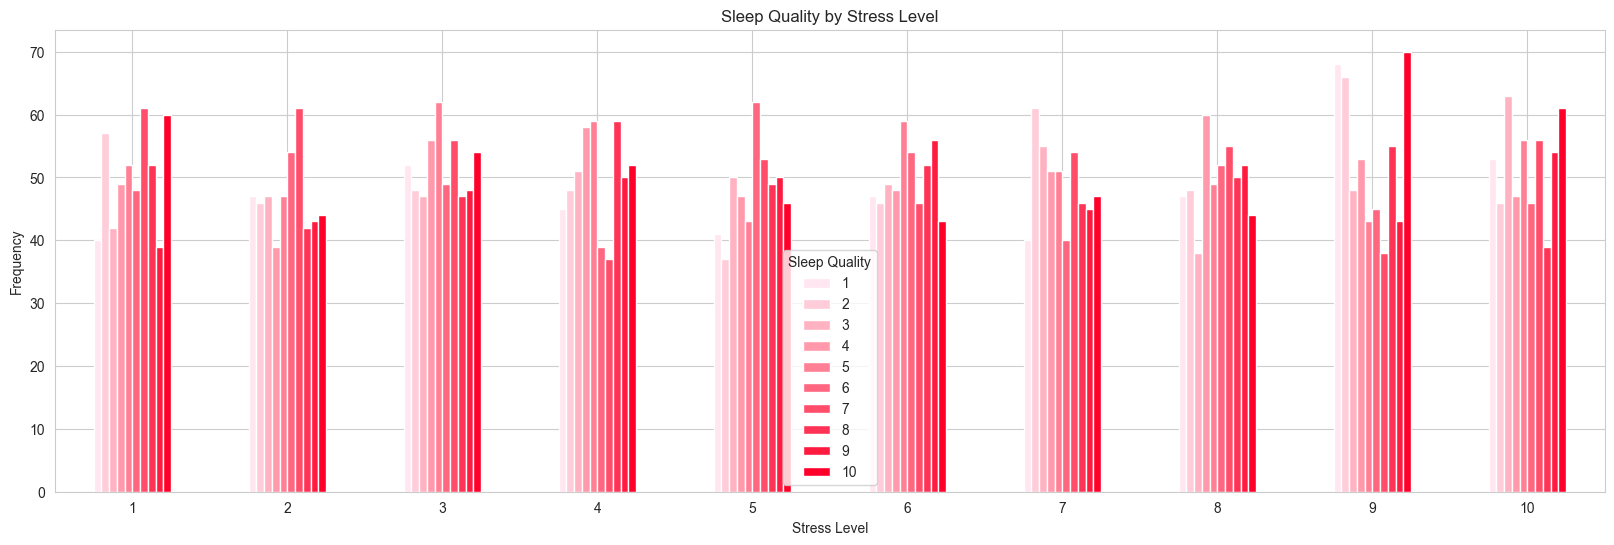

In [35]:

pastel_pink_palette = [
    "#ffe6f0", "#ffccd9", "#ffb3c2", "#ff99ab", "#ff8095",
    "#ff6680", "#ff4d6a", "#ff3355", "#ff1a40", "#ff002a"
]

pd.crosstab(df['Stress Level'], df['Sleep Quality']).plot(
    kind="bar", figsize=(20, 6), color=pastel_pink_palette
)

plt.title('Sleep Quality by Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.legend(title='Sleep Quality')
plt.savefig('../../outputs/figures/1_4_stress_level_vs_sleep_quality.png', dpi=300, bbox_inches='tight')
plt.show()

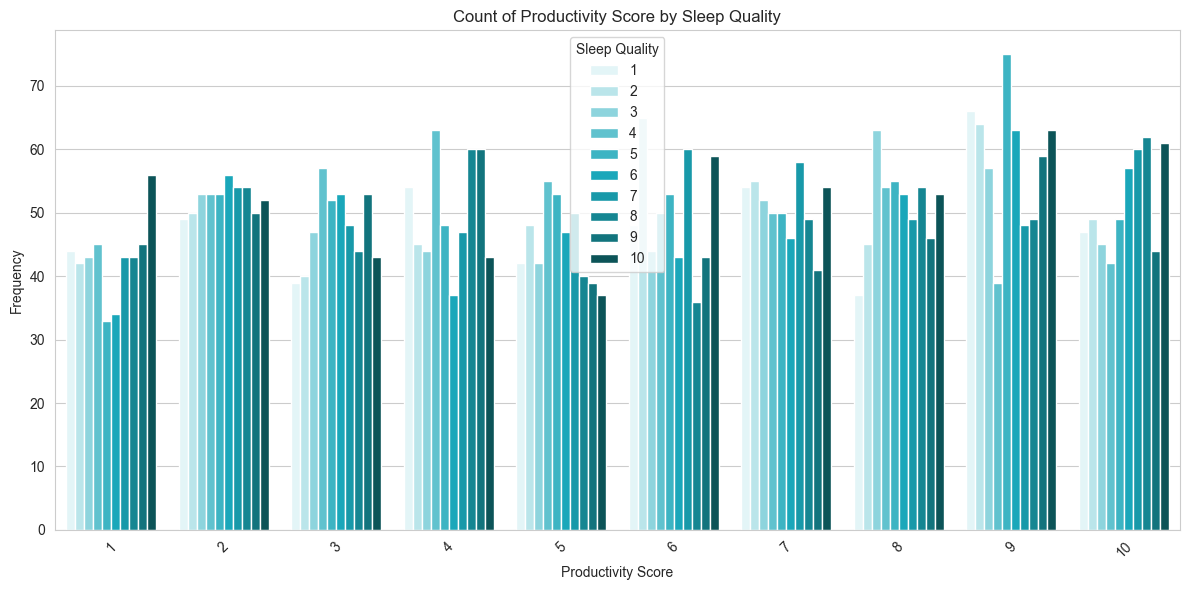

In [37]:

pastel_palette = {
    1: "#e0f7fa",
    2: "#b2ebf2",
    3: "#80deea",
    4: "#4dd0e1",
    5: "#26c6da",
    6: "#00bcd4",
    7: "#00acc1",
    8: "#0097a7",
    9: "#00838f",
    10: "#006064",
}

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x="Productivity Score", hue="Sleep Quality", palette=pastel_palette)

plt.title("Count of Productivity Score by Sleep Quality")
plt.xlabel("Productivity Score")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Sleep Quality")
plt.tight_layout()
plt.savefig('../../outputs/figures/1_5_productivity_vs_sleep_quality.png', dpi=300, bbox_inches='tight')
plt.show()

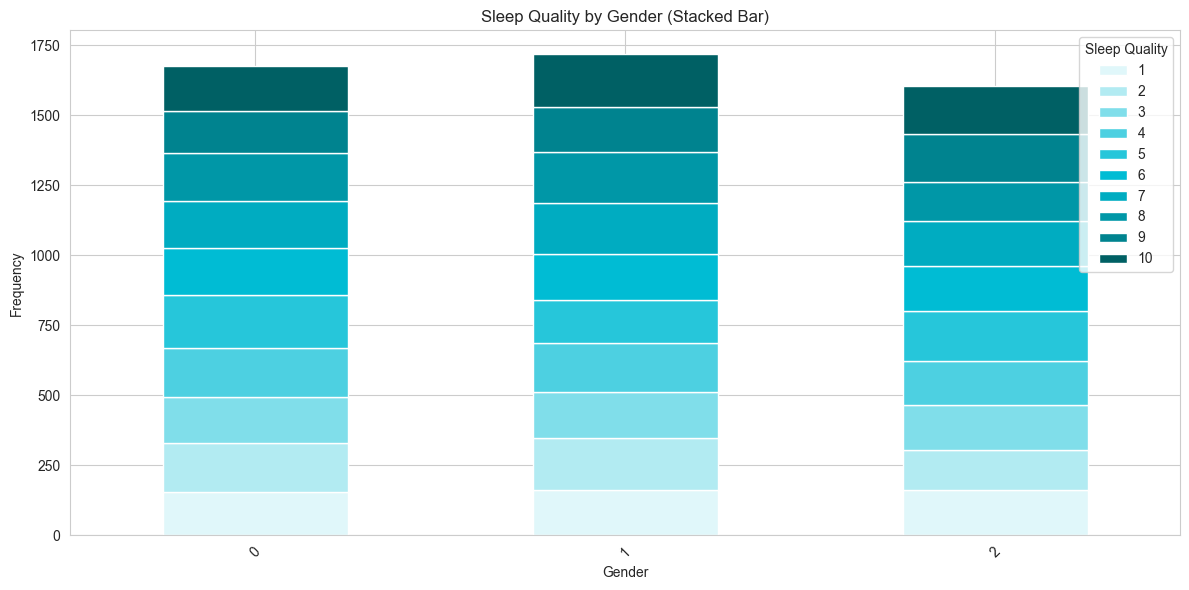

In [38]:

ct = pd.crosstab(df['Gender'], df['Sleep Quality'])

sky_blue_palette = [
    "#e0f7fa", "#b2ebf2", "#80deea", "#4dd0e1", "#26c6da",
    "#00bcd4", "#00acc1", "#0097a7", "#00838f", "#006064"
]

ct.plot(kind='bar', stacked=True, figsize=(12, 6), color=sky_blue_palette)

plt.title("Sleep Quality by Gender (Stacked Bar)")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Sleep Quality")
plt.tight_layout()
plt.show()


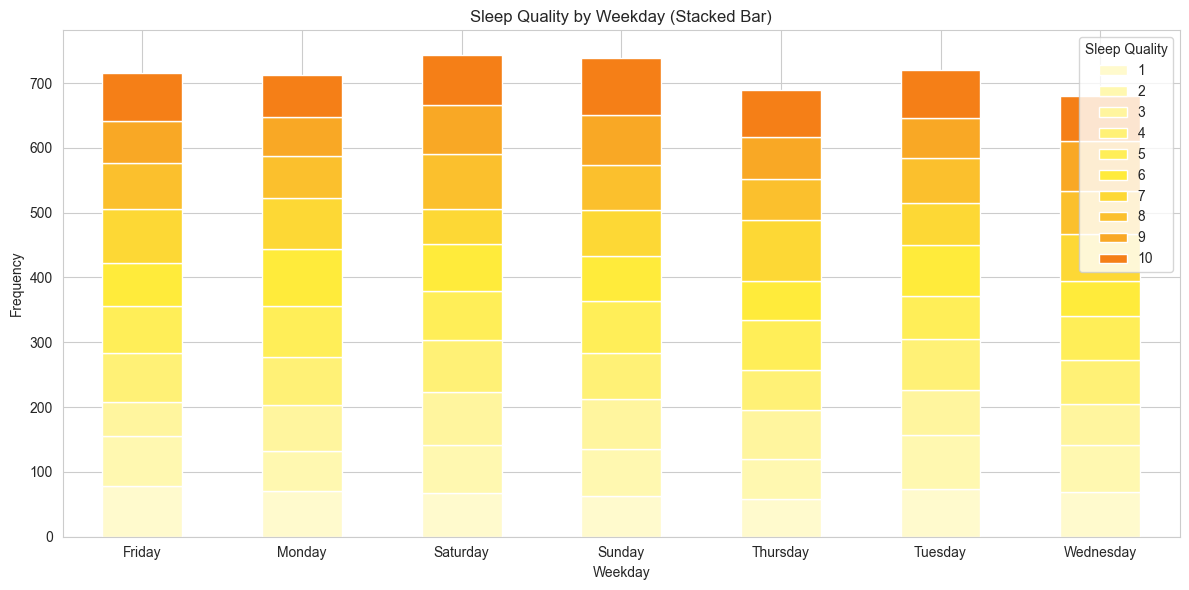

In [39]:

ct = pd.crosstab(df['Weekday'], df['Sleep Quality'])

lemon_palette = [
    "#FFFACD", "#FFF8B0", "#FFF59E", "#FFF176", "#FFEE58",
    "#FFEB3B", "#FDD835", "#FBC02D", "#F9A825", "#F57F17"
]

ct.plot(kind='bar', stacked=True, figsize=(12, 6), color=lemon_palette)

plt.title("Sleep Quality by Weekday (Stacked Bar)")
plt.xlabel("Weekday")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Sleep Quality")
plt.tight_layout()
plt.show()

In [ ]:

labels = ["Yes", "No"]
colors = ["#FFFACD", "#ADD8E6"]

plt.figure(figsize=(6, 6))
plt.pie(df["is_acquired"].value_counts(), labels=labels, colors=colors, autopct='%.02f%%')
plt.title("Acquisition Status Distribution")
plt.show()


KeyError: 'is_acquired'

<Figure size 600x600 with 0 Axes>

In [ ]:

ct = pd.crosstab(df2['is_listed'], df2['success'])

ct.plot(kind='bar', stacked=True, figsize=(12, 6), color=["#FFFACD", "#D8BFD8"])

plt.title("Success by Listing Status (Stacked Bar)")
plt.xlabel("Is Listed")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.legend(title="Success")
plt.tight_layout()
plt.show()


####**연속형**####

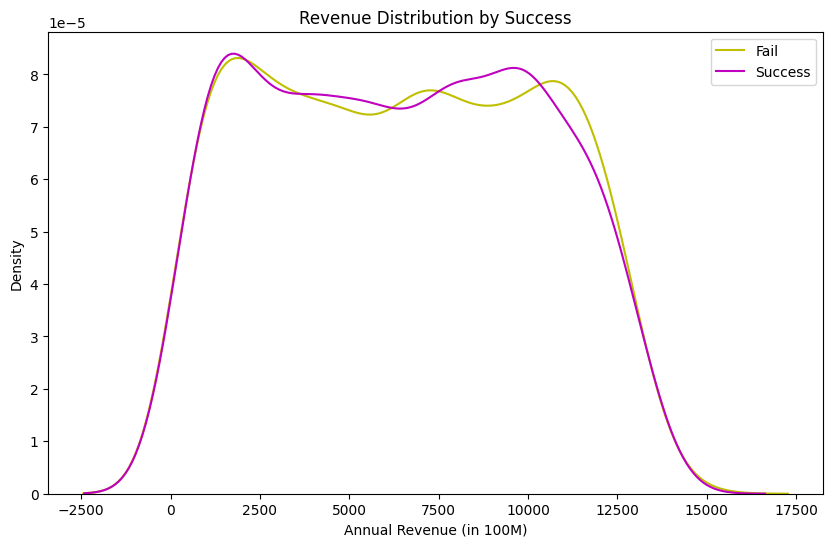

In [ ]:
|import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.kdeplot(data=df[df.success == 0], x="annual_revenue_100M", color="y", label="Fail")
sns.kdeplot(data=df[df.success == 1], x="annual_revenue_100M", color="m", label="Success")

plt.title("Revenue Distribution by Success")
plt.xlabel("Annual Revenue (in 100M)")
plt.ylabel("Density")
plt.legend()
plt.show()

<Figure size 2000x1000 with 0 Axes>

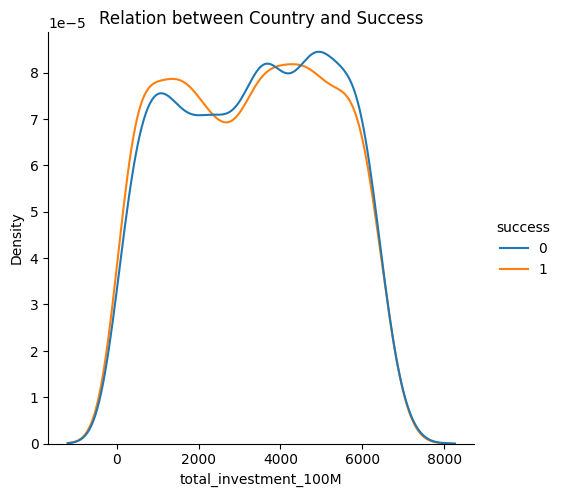

In [ ]:
plt.figure(figsize=(20,10))

sns.displot(data=df, x="total_investment_100M", hue="success", kind="kde")
plt.title("Relation between Country and Success")
plt.show()

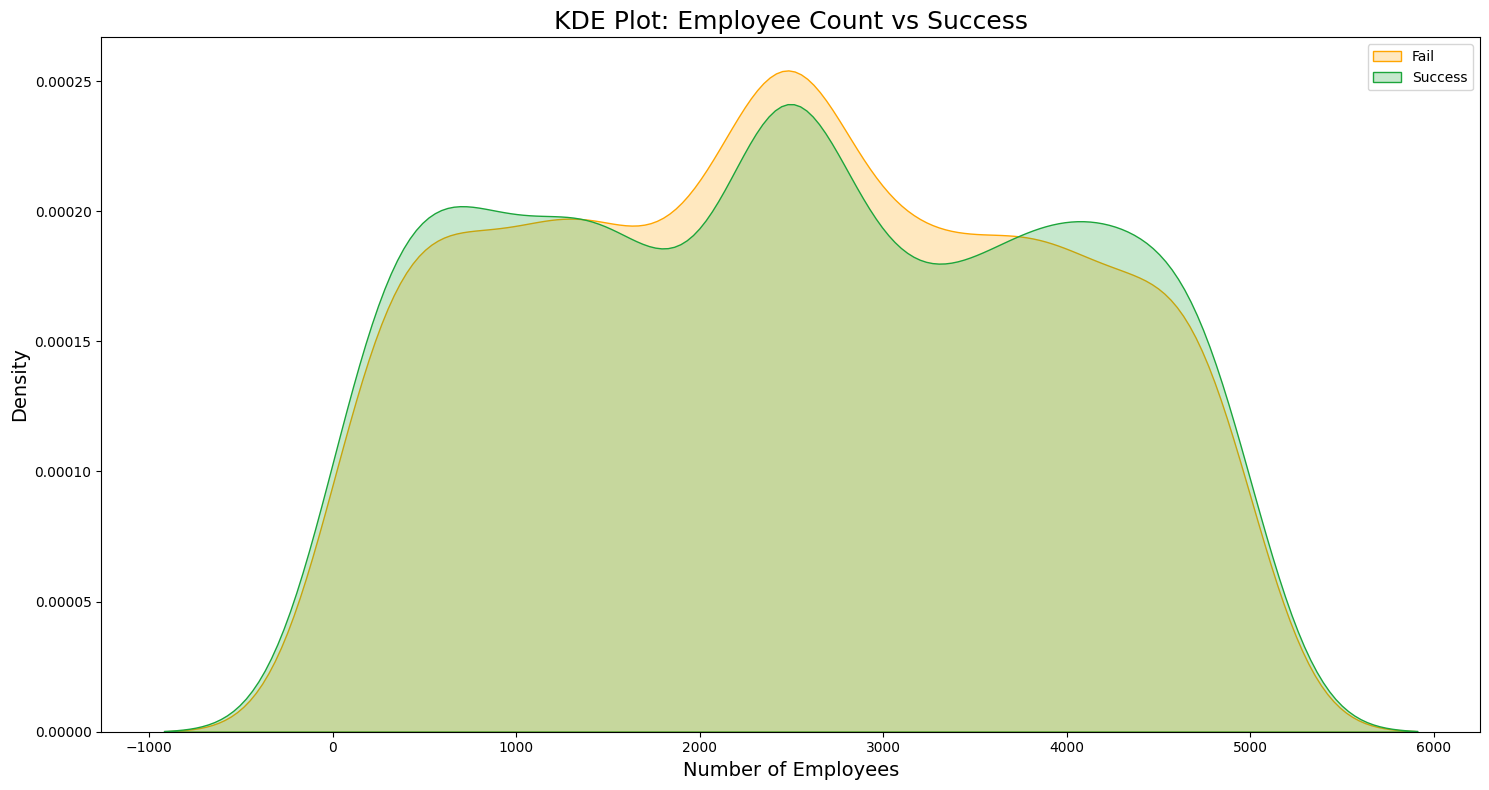

In [ ]:

plt.figure(figsize=(15, 8))

sns.kdeplot(data=df[df.success == 0], x='num_employees', label='Fail', color='#FFA500', fill=True)
sns.kdeplot(data=df[df.success == 1], x='num_employees', label='Success', color='#1CA53B', fill=True)

plt.title('KDE Plot: Employee Count vs Success', fontsize=18)
plt.xlabel('Number of Employees', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

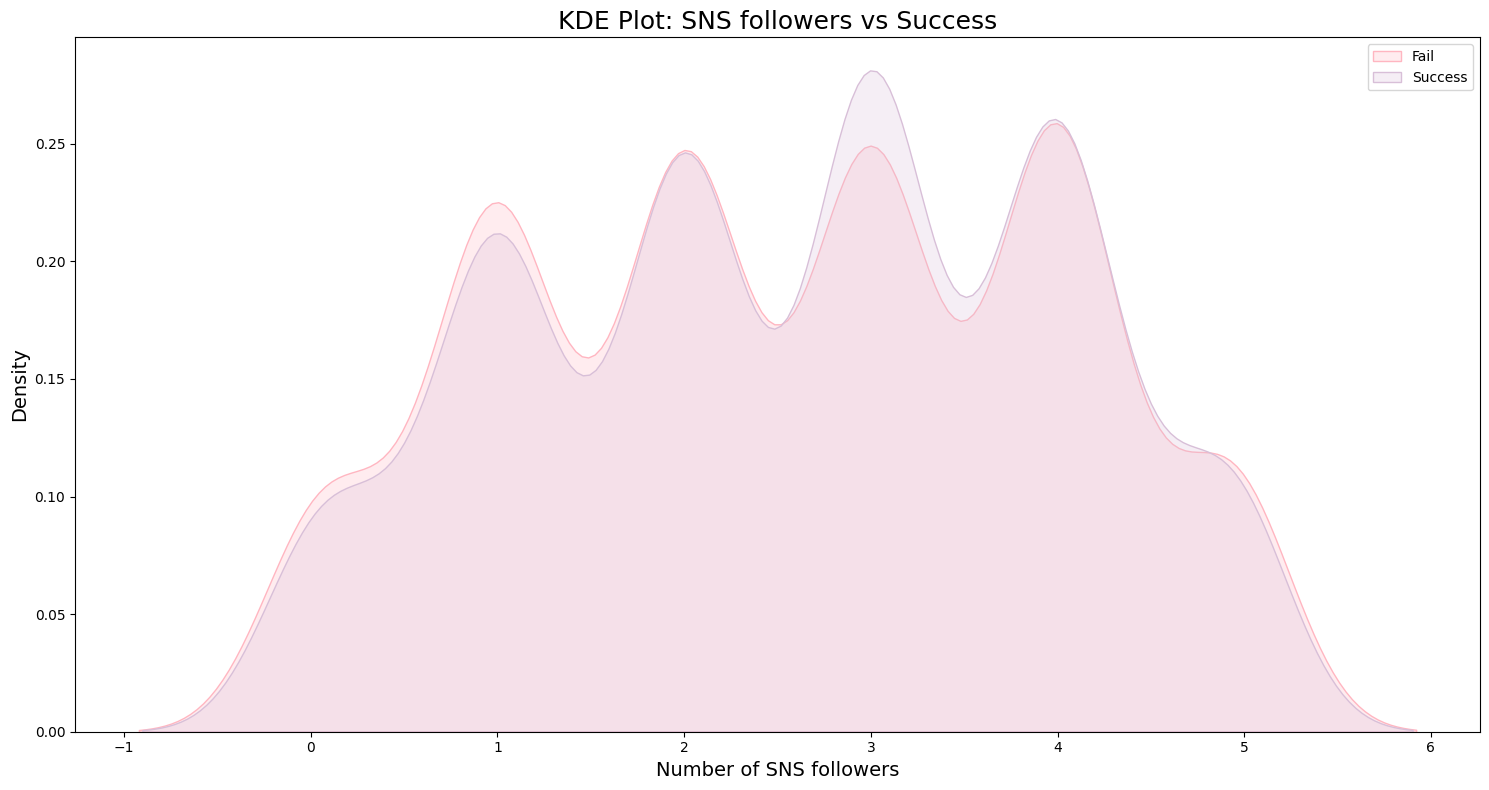

In [ ]:

plt.figure(figsize=(15, 8))

sns.kdeplot(data=df[df.success == 0], x='sns_followers_mil', label='Fail', color='#FFB6C1', fill=True)
sns.kdeplot(data=df[df.success == 1], x='sns_followers_mil', label='Success', color='#D8BFD8', fill=True)

plt.title('KDE Plot: SNS followers vs Success', fontsize=18)
plt.xlabel('Number of SNS followers', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()